# CS 412 Homework 1

## Load the Training Dataset
We use the built-in `mnist` dataset from Keras. The MNIST dataset consists of 28x28 grayscale images of handwritten digits (0–9). The `mnist.load_data()` function returns four arrays: `x_train`, `y_train`, `x_test`, and `y_test`.


In [76]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data(path="mnist.npz")

print("Training data shape:", x_train.shape, y_train.shape)
print("Test data shape:    ", x_test.shape, y_test.shape)

Training data shape: (60000, 28, 28) (60000,)
Test data shape:     (10000, 28, 28) (10000,)


## Reshape the MNIST Data
Each MNIST image is 28x28 pixels. To feed them into a model as a vector, we flatten these matrices into a single dimension (28 * 28 = 784).


In [79]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

print( x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


## Split the Data into Training, Validation, and Test Sets
It is important to split the dataset into training, validation, and test sets to properly evaluate model performance. The training set is used to fit the model, the validation set is used for hyperparameter tuning or early stopping, and the test set is used for the final evaluation of the model.


In [82]:
from sklearn.model_selection import train_test_split 

x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train, y_train, shuffle=True, test_size=0.2)

# Print the shapes of training, validation, and test sets
print("Train set shape:     ", x_train_split.shape, y_train_split.shape)
print("Validation set shape:", x_val_split.shape, y_val_split.shape)
print("Test set shape:      ", x_test.shape,     y_test.shape)


Train set shape:      (48000, 784) (48000,)
Validation set shape: (12000, 784) (12000,)
Test set shape:       (10000, 784) (10000,)


## Checking Class Distribution
Here, we examine the distribution of digit classes in our training set to identify if any classes are underrepresented. This helps us see how balanced (or imbalanced) our data is.


Class Distribution: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


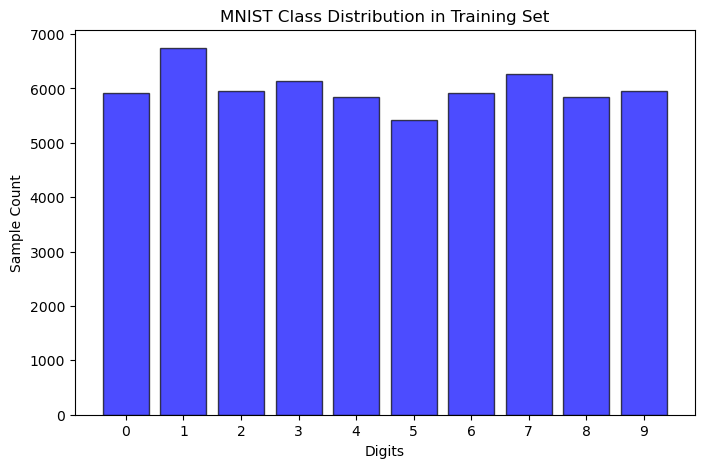

In [85]:
import matplotlib.pyplot as plt
import numpy as np

unique, counts = np.unique(y_train, return_counts=True)

# Print the class distribution
class_distribution = dict(zip(unique, counts))
print("Class Distribution:", class_distribution)

# Plot the class distribution as a bar chart
plt.figure(figsize=(8, 5))
plt.bar(unique, counts, color="blue", alpha=0.7, edgecolor="black")
plt.xlabel("Digits")
plt.ylabel("Sample Count")
plt.title("MNIST Class Distribution in Training Set")
plt.xticks(unique)
plt.show()

## Calculate Mean and Standard Deviation of the Pixel Values
In this section, we compute basic statistics (mean and standard deviation) of the pixel intensities in the training set. These metrics help us understand how our data is scaled and whether normalization or standardization might be beneficial.


In [88]:
# Calculate the mean and std of training set
mean_train = np.mean(x_train_split)
std_train = np.std(x_train_split)
print(f"Mean: {mean_train:.4f}, Standard Deviation: {std_train:.4f}")

Mean: 33.3243, Standard Deviation: 78.5736


## Visualizing Sample Images
Let's visualize at least one sample image for each digit. This helps ensure that images are loaded and labeled correctly, and gives us a quick look at the variety of handwriting styles in the dataset.


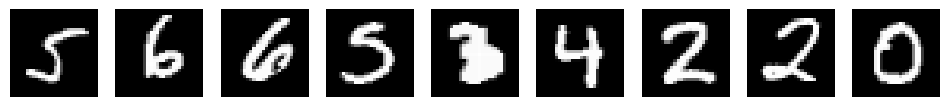

In [91]:
fig, axes = plt.subplots(1, 9, figsize=(12, 4))
for i, ax in enumerate(axes):
    idx = np.random.randint(0, len(x_train))
    ax.imshow(x_train[idx].reshape(28, 28), cmap='gray')
    ax.axis("off")
plt.show()


## Data Preprocessing: Normalization
To help our model converge faster and perform better, we normalize the pixel values from [0, 255] down to [0, 1]. This rescaling makes training more stable and often improves results.


## Normalization:
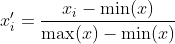

In [95]:
# --------------------------------
# Print values BEFORE normalization
# --------------------------------
print("\n=== Before Normalization ===")
print("Max pixel value (train):", np.max(x_train_split))  # Should be 255
print("Min pixel value (train):", np.min(x_train_split))  # Should be 0
print("Data type (train):      ", x_train_split.dtype)    # Should be uint8

# --------------------------------
# Apply normalization: [0, 255] → [0, 1]
# --------------------------------
x_train_split = x_train_split.astype('float32') / 255  # Cast to float32 and normalize
x_val_split = x_val_split.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# --------------------------------
# Print values AFTER normalization
# --------------------------------
print("\n=== After Normalization ===")
print("Max pixel value (train):", np.max(x_train_split))  # Should be ~1.0
print("Min pixel value (train):", np.min(x_train_split))  # Should be ~0.0
print("Data type (train):      ", x_train_split.dtype)    # Should be float32


=== Before Normalization ===
Max pixel value (train): 255
Min pixel value (train): 0
Data type (train):       uint8

=== After Normalization ===
Max pixel value (train): 1.0
Min pixel value (train): 0.0
Data type (train):       float32


## k-NN Classifier: Hyperparameter Tuning
In this section, we explore different values of *k* (the number of neighbors) for the k-NN algorithm. We train the model on the training set and measure its performance on the validation set for each *k*.


In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# define hyperparameter candidates
k_values = [1, 3, 5, 7, 9]

# empyt list to store validation accuracies
validation_accuracies = []

for k in k_values:
    # initialize a k-NN model with n_neighbors parameter set to k
    knn = KNeighborsClassifier(n_neighbors=k)

    # train the model on the training set
    knn.fit(x_train_split, y_train_split)

    # get the predictions of the model on the validation set
    y_val_pred = knn.predict(x_val_split)

    # compute the accuracy of the predictions on the validation set and append it to validation_accuracies
    acc = accuracy_score(y_val_split, y_val_pred)
    validation_accuracies.append(acc)
    print(f"Validation Accuracy for k={k}: {acc:.4f} ")

best_k = k_values[validation_accuracies.index(max(validation_accuracies))]
print(f"\nBest performing k: {best_k} (Accuracy: {max(validation_accuracies):.4f})")

Validation Accuracy for k=1: 0.9700 
Validation Accuracy for k=3: 0.9707 
Validation Accuracy for k=5: 0.9681 
Validation Accuracy for k=7: 0.9682 
Validation Accuracy for k=9: 0.9666 

Best performing k: 3 (Accuracy: 0.9707)


## Plot the Obtained Validation Accuracies
To visualize which *k* value works best, we plot the validation accuracy against *k*. This helps us see if there's a clear peak or trend.


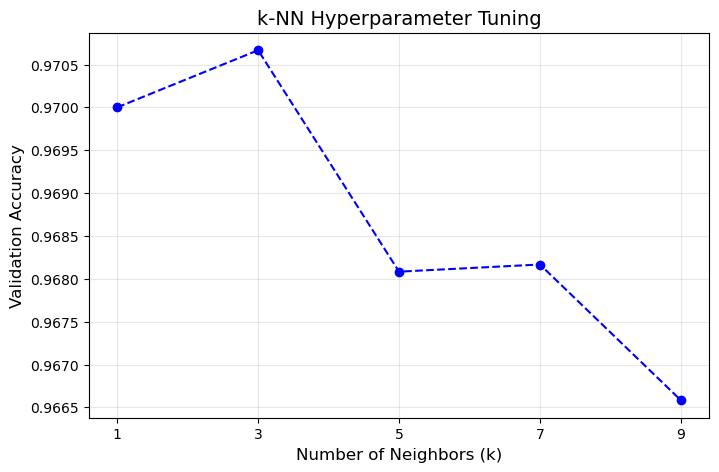

In [101]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, validation_accuracies, marker='o', linestyle='--', color='blue')
plt.xlabel("Number of Neighbors (k)", fontsize=12)
plt.ylabel("Validation Accuracy", fontsize=12)
plt.title("k-NN Hyperparameter Tuning", fontsize=14)
plt.xticks(k_values)
plt.grid(True, alpha=0.3)
plt.show()

## Final Model Training and Evaluation
After choosing the best hyperparameters, we retrain our final k-NN model using both the training and validation sets combined. We then evaluate it on the test set to measure its performance on unseen data.


In [106]:
from sklearn.metrics import (precision_score, recall_score, f1_score, confusion_matrix)
import seaborn as sns

# Combine training and validation sets
x_train_combined = np.concatenate([x_train_split, x_val_split], axis=0)
y_train_combined = np.concatenate([y_train_split, y_val_split], axis=0)

# Initialize final model with best k
final_knn = KNeighborsClassifier(n_neighbors=best_k)

# Train on combined data
final_knn.fit(x_train_combined, y_train_combined)

# Get test predictions
y_test_pred = final_knn.predict(x_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='macro')
recall = recall_score(y_test, y_test_pred, average='macro')
f1 = f1_score(y_test, y_test_pred, average='macro')

print("\n=== Final Model Evaluation ===")
print(f"Test Accuracy:  {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall:    {recall:.4f}")
print(f"Test F1-score:  {f1:.4f}")


=== Final Model Evaluation ===
Test Accuracy:  0.9705
Test Precision: 0.9709
Test Recall:    0.9701
Test F1-score:  0.9704


## Generate a Confusion Matrix
A confusion matrix gives us a more detailed look at how the model is performing on each digit class. It shows which digits the model is confusing with others.


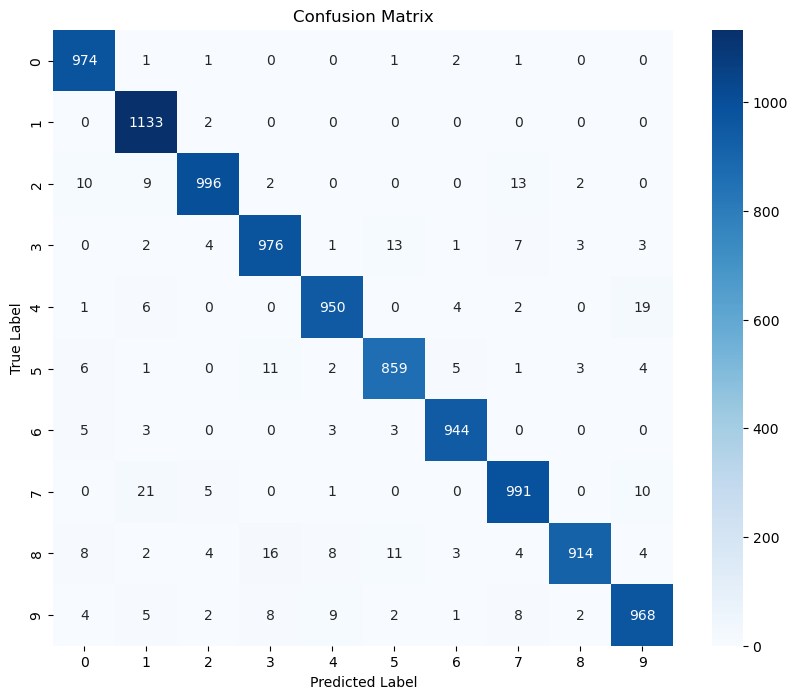

In [113]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), 
            yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Analyze Frequent Misclassifications
We identify the most common misclassifications in the confusion matrix to see which digit pairs the model tends to confuse. This analysis can guide potential improvements in data preprocessing or model tuning.


In [116]:
# Find most common misclassifications
misclassified = cm.copy()
np.fill_diagonal(misclassified, 0)  

# Get top 3 most confused digit pairs
top_misclassifications = []
for _ in range(3):
    idx = np.unravel_index(misclassified.argmax(), misclassified.shape)
    top_misclassifications.append((idx[0], idx[1]))
    misclassified[idx] = 0  

print("\nMost Frequent Misclassifications:")
for true, pred in top_misclassifications:
    print(f"True: {true} → Predicted: {pred} ({cm[true, pred]} cases)")


Most Frequent Misclassifications:
True: 7 → Predicted: 1 (21 cases)
True: 4 → Predicted: 9 (19 cases)
True: 8 → Predicted: 3 (16 cases)


## Visualize Misclassified Examples
To get a concrete sense of why the model might be confusing certain digits, we can look at a few of the misclassified samples and see how similar they appear to the incorrect prediction.


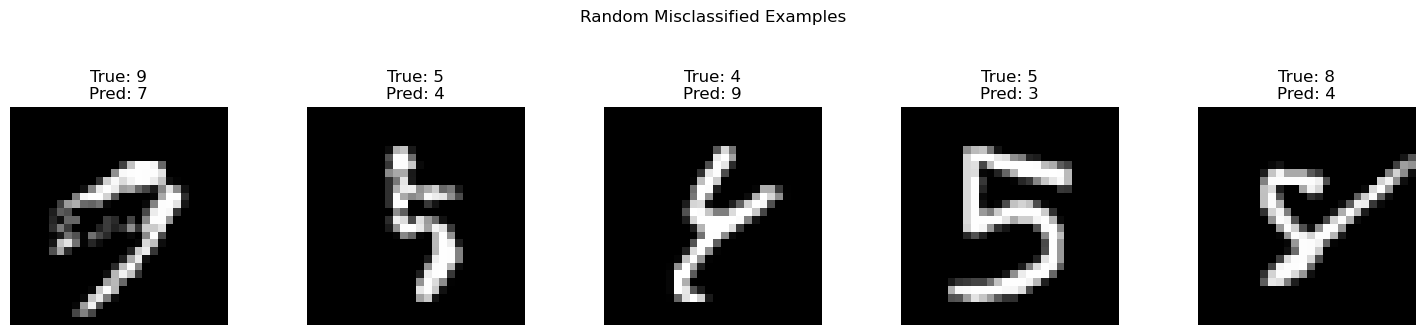

In [119]:
# Get indices of misclassified samples
misclassified_indices = np.where(y_test != y_test_pred)[0]

# Randomly select 5 examples
np.random.seed(42) 
random_misclassified = np.random.choice(misclassified_indices, 5, replace=False)

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    idx = random_misclassified[i]
    ax.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    ax.set_title(f"True: {y_test[idx]}\nPred: {y_test_pred[idx]}")
    ax.axis('off')
plt.suptitle("Random Misclassified Examples", y=1.1)
plt.tight_layout()
plt.show()

## Decision Tree Classifier
### Model Training and Hyperparameter Tuning
We now explore a different model, a Decision Tree classifier. We will test various hyperparameters (e.g., `max_depth` and `min_samples_split`) to see which configuration gives the best validation accuracy.


In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import itertools

# Define hyperparameter grid
param_grid = {
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5]
}

# Generate all parameter combinations
all_params = list(itertools.product(param_grid['max_depth'], param_grid['min_samples_split']))

results = []

# Experiment with different configurations
for max_depth, min_samples_split in all_params:
    # Initialize model with current parameters
    dt = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )
    
    # Train on training set
    dt.fit(x_train_split, y_train_split)
    
    # Predict on validation set
    y_val_pred = dt.predict(x_val_split)
    
    # Calculate validation accuracy
    val_acc = accuracy_score(y_val_split, y_val_pred)
    
    # Store results
    results.append({
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'validation_accuracy': val_acc
    })
    
    # Print current configuration results
    print(f"max_depth={max_depth:2d} | min_samples_split={min_samples_split:2d} | "
          f"Validation Accuracy: {val_acc:.4f}")

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Find best performing configuration
best_config = results_df.loc[results_df['validation_accuracy'].idxmax()]
print("\n=== Best Configuration ===")
print(f"Max Depth:          {best_config['max_depth']}")
print(f"Min Samples Split:  {best_config['min_samples_split']}")
print(f"Validation Accuracy: {best_config['validation_accuracy']:.4f}")

max_depth= 2 | min_samples_split= 2 | Validation Accuracy: 0.3367
max_depth= 2 | min_samples_split= 5 | Validation Accuracy: 0.3367
max_depth= 5 | min_samples_split= 2 | Validation Accuracy: 0.6693
max_depth= 5 | min_samples_split= 5 | Validation Accuracy: 0.6693
max_depth=10 | min_samples_split= 2 | Validation Accuracy: 0.8435
max_depth=10 | min_samples_split= 5 | Validation Accuracy: 0.8428

=== Best Configuration ===
Max Depth:          10.0
Min Samples Split:  2.0
Validation Accuracy: 0.8435


## Final Model Evaluation on the Test Set
After determining the best hyperparameters, we retrain the model on the combined (training + validation) data and evaluate it on the test set. This final evaluation step helps us measure how well our model performs on completely unseen data.


In [125]:
from sklearn.metrics import (accuracy_score, precision_score, 
                             recall_score, f1_score, confusion_matrix,
                             roc_curve, auc, RocCurveDisplay)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import label_binarize

# Initialize best model with optimal parameters (from previous tuning)
best_dt = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=2,
    random_state=42
)

# Train on combined training+validation data
best_dt.fit(x_train_combined, y_train_combined)

# Get predictions and probabilities
y_test_pred = best_dt.predict(x_test)
y_test_proba = best_dt.predict_proba(x_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='macro')
recall = recall_score(y_test, y_test_pred, average='macro')
f1 = f1_score(y_test, y_test_pred, average='macro')

print("\n=== Final Model Evaluation ===")
print(f"Test Accuracy:  {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall:    {recall:.4f}")
print(f"Test F1-score:  {f1:.4f}")


=== Final Model Evaluation ===
Test Accuracy:  0.8663
Test Precision: 0.8656
Test Recall:    0.8644
Test F1-score:  0.8648


## Confusion Matrix Analysis
A confusion matrix gives a detailed breakdown of correct and incorrect predictions, showing which classes the model tends to confuse.


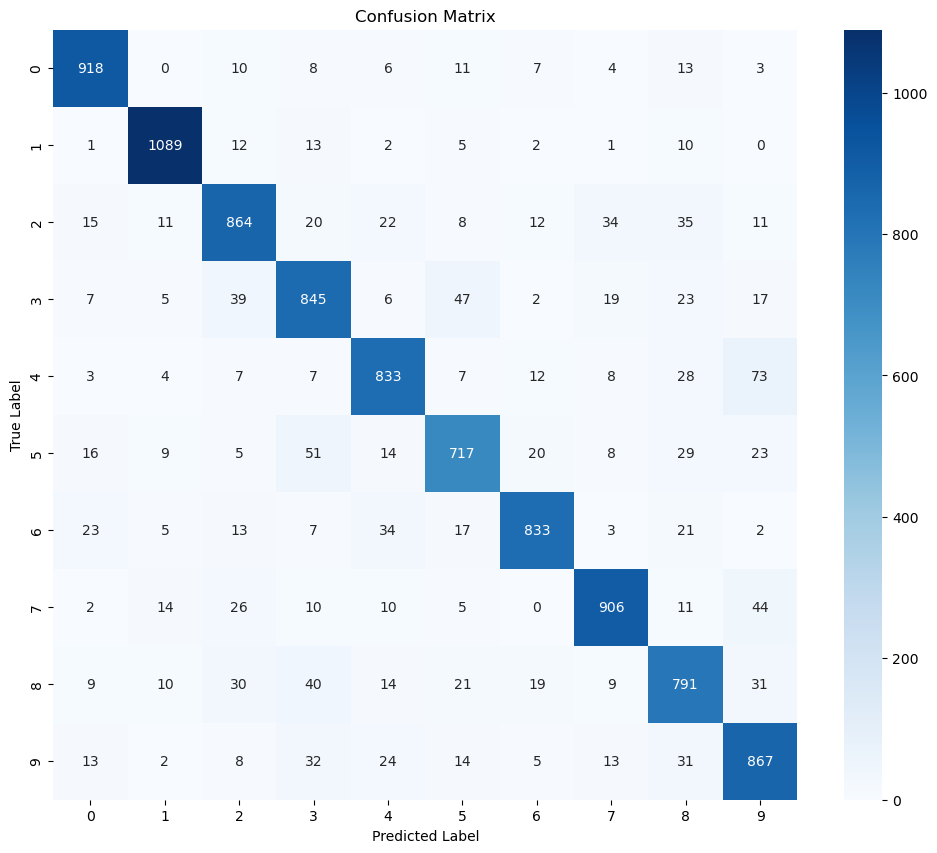

In [128]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), 
            yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Identify Top Misclassifications
We look at the most common misclassifications from the confusion matrix to see which digit pairs cause the greatest confusion for our model.


In [131]:
# Find top misclassifications
misclassified = cm.copy()
np.fill_diagonal(misclassified, 0)
top_misclassifications = []

for _ in range(3):
    idx = np.unravel_index(misclassified.argmax(), misclassified.shape)
    top_misclassifications.append((idx[0], idx[1], misclassified[idx]))
    misclassified[idx] = 0  

print("\nTop Misclassifications:")
for true, pred, count in top_misclassifications:
    print(f"True: {true} → Pred: {pred} ({count} cases)")


Top Misclassifications:
True: 4 → Pred: 9 (73 cases)
True: 5 → Pred: 3 (51 cases)
True: 3 → Pred: 5 (47 cases)


## ROC Curves and AUC Scores
To further assess model performance, we can plot ROC (Receiver Operating Characteristic) curves and calculate the AUC (Area Under the Curve). For multi-class problems, we plot one ROC curve per class.


/var/folders/nw/rnq0s_g505nfzrm9_5h_vrr40000gn/T/ipykernel_14282/1456517601.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', 10)


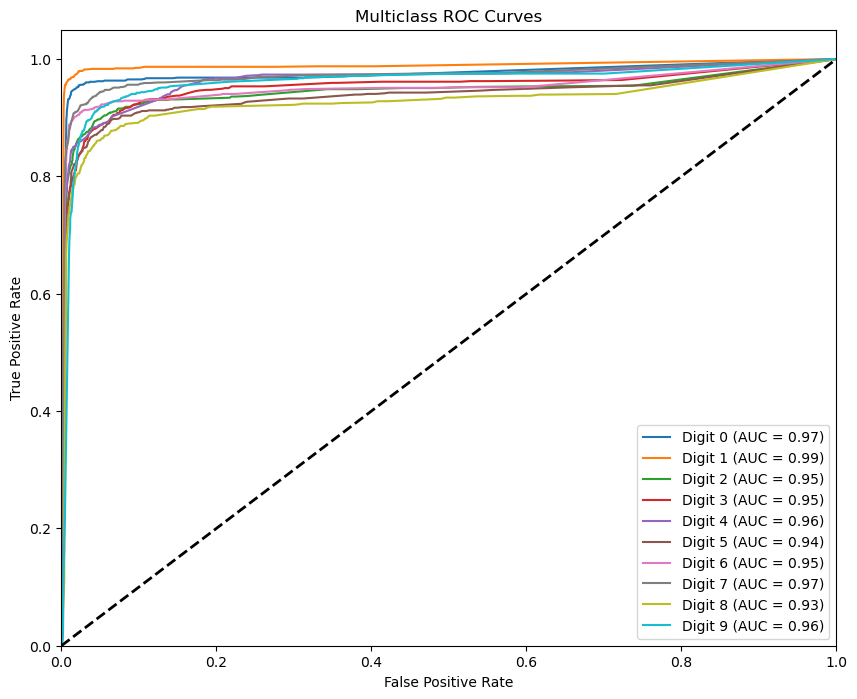

In [134]:
# Binarize labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=range(10))

plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('tab10', 10)

# Plot ROC for each class
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_bin[:,i], y_test_proba[:,i])
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color=colors(i),
             label=f'Digit {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curves')
plt.legend(loc="lower right")
plt.show()